<a href="https://colab.research.google.com/github/tanumeena/tanumeena/blob/main/heart_failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/hepatitis-c-dataset")

print("Path to dataset files:", path)

100%|██████████| 14.8k/14.8k [00:00<00:00, 16.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/fedesoriano/hepatitis-c-dataset/versions/1


In [4]:
from google.colab import files
uploaded = files.upload()


Saving heart.csv to heart.csv


In [6]:
import pandas as pd

# Replace with the actual file name if different
df = pd.read_csv("heart.csv", engine='python', on_bad_lines='skip')
print(df.head())


   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [7]:
# Check for missing values
print(df.isnull().sum())

# Convert categorical variables if needed
df = pd.get_dummies(df, drop_first=True)

# Check the actual column names
print(df.columns)

# Use the correct column name for the target
# Update this if the column is named differently (like 'HeartDisease')
target_column = "HeartDisease"

# Separate features and target variable
X = df.drop(target_column, axis=1)
y = df[target_column]

# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')


In [9]:
# Initialize Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
y_pred = model.predict(X_test)


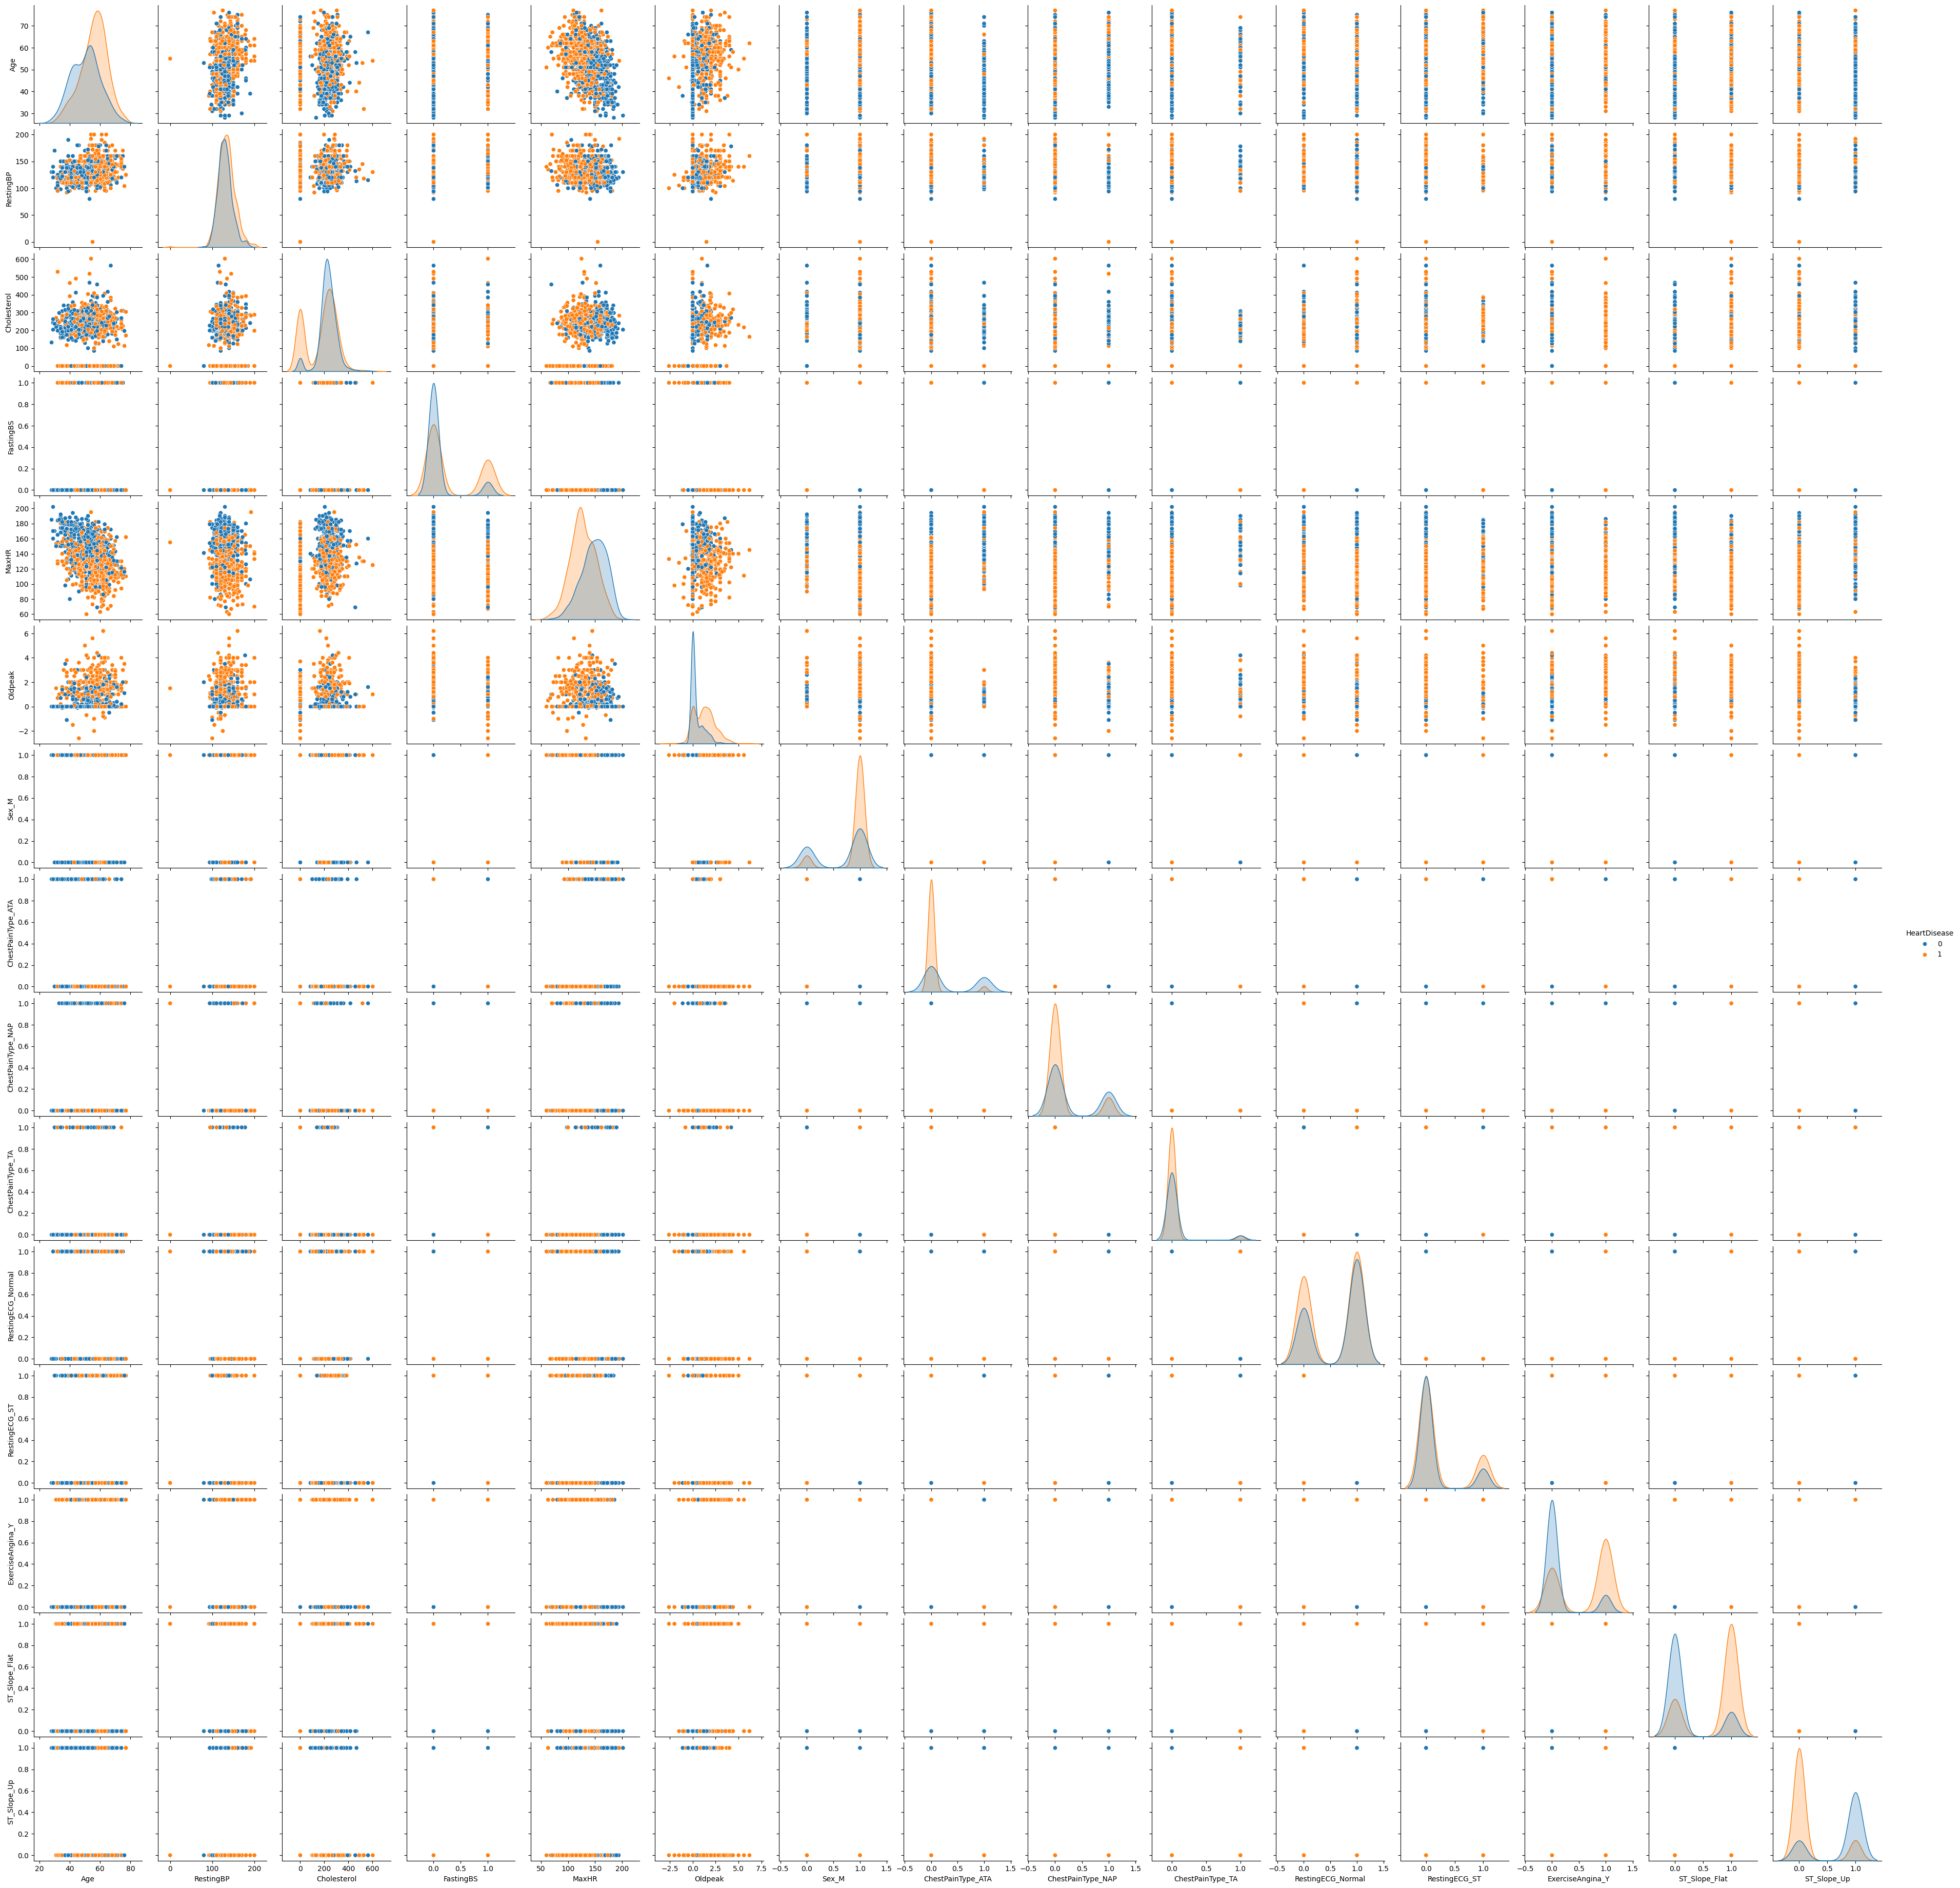

In [11]:
# Data distribution of numerical features
sns.pairplot(df, hue='HeartDisease')
plt.show()

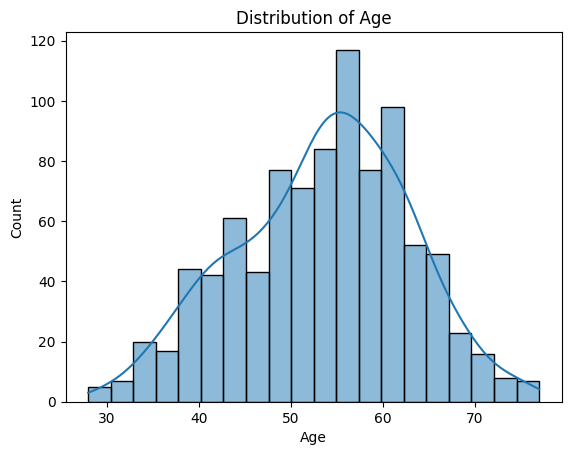

In [12]:
# Distribution of Age
sns.histplot(x='Age', data=df, kde=True, bins=20)
plt.title('Distribution of Age')
plt.show()

In [13]:
df = pd.DataFrame({
    "age": [],
    "sex": [],  # 0 = female, 1 = male
    "cp": [],  # chest pain type
    "trestbps": [],  # resting blood pressure
    "chol": [],
    "fbs": [],  # fasting blood sugar
    "restecg": [],
    "thalach": [],
    "exang": [],
    "oldpeak": [],
    "slope": [],
    "ca": [],
    "thal": [],
    "smoking": [],
    "alcohol": [],
    "diabetes": [],
    "anemia": [],
    "creatinine_phosphokinase": [],
    "ejection_fraction": [],
    "platelets": [],
    "serum_creatinine": [],
    "serum_sodium": [],
    "high_blood_pressure": [],
    "DEATH_EVENT": []  # Target variable
})


In [14]:
def unique_code():
    return str(uuid.uuid4())[:8]

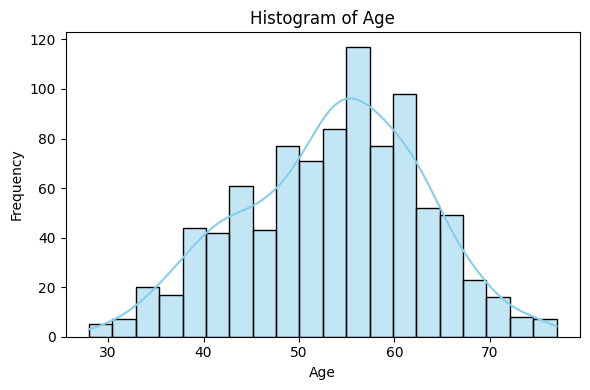

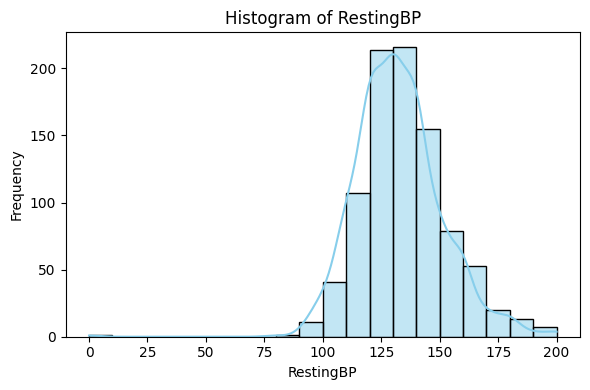

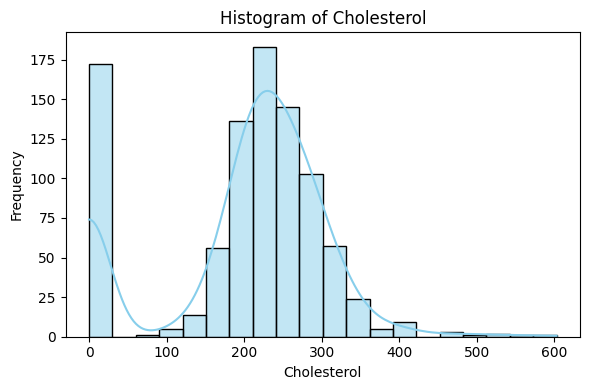

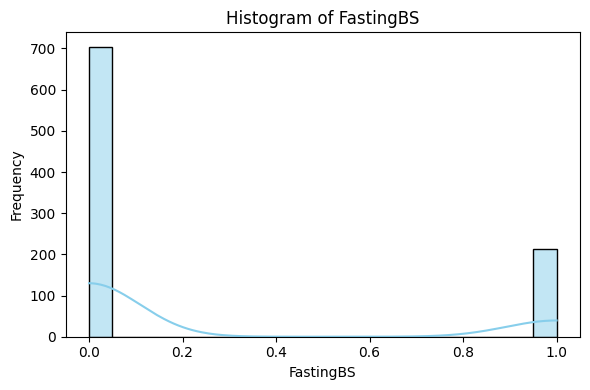

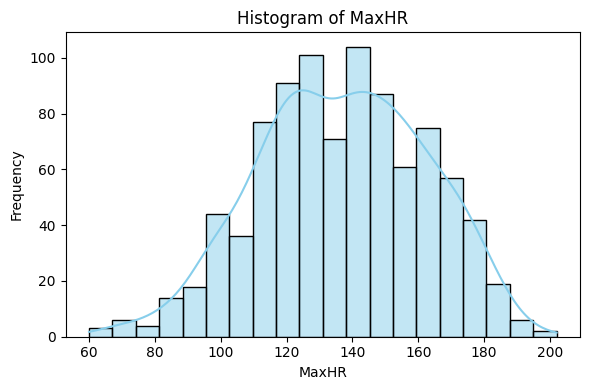

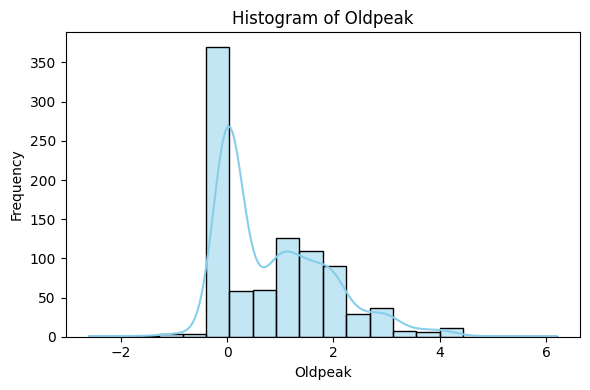

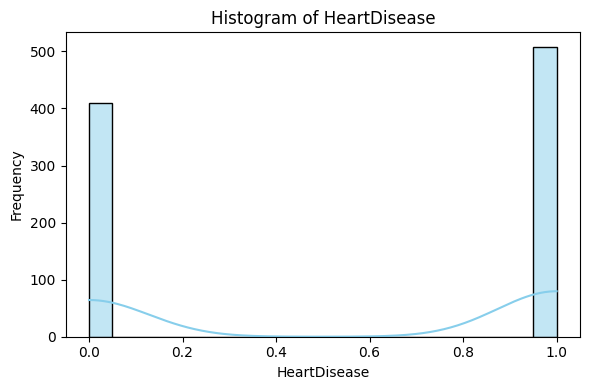

In [15]:

# Load dataset from CSV
df = pd.read_csv('heart.csv')

# Now run the histogram code
# 1. Histogram for Numerical Columns
for col in df.select_dtypes(include='number').columns:
    if col != "DEATH_EVENT":
        plt.figure(figsize=(6, 4))
        sns.histplot(df[col], kde=True, bins=20, color='skyblue')
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

Accuracy: 91.00%


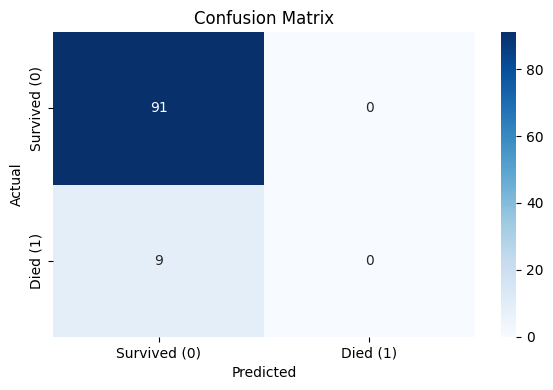


Classification Report:
              precision    recall  f1-score   support

Survived (0)       0.91      1.00      0.95        91
    Died (1)       0.00      0.00      0.00         9

    accuracy                           0.91       100
   macro avg       0.46      0.50      0.48       100
weighted avg       0.83      0.91      0.87       100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
# Load your dataset
df = pd.read_csv("heart.csv")  # or any heart dataset

# Simulated dataset for demo
df = pd.DataFrame({
    "age": np.random.randint(40, 80, 500),
    "chol": np.random.randint(150, 300, 500),
    "trestbps": np.random.randint(90, 180, 500),
    "thalach": np.random.randint(100, 200, 500),
    "ejection_fraction": np.random.randint(15, 80, 500),
    "serum_creatinine": np.round(np.random.uniform(0.5, 4.0, 500), 2),
    "sex": np.random.randint(0, 2, 500),
    "diabetes": np.random.randint(0, 2, 500),
    "high_blood_pressure": np.random.randint(0, 2, 500),
    "DEATH_EVENT": np.random.choice([0, 1], 500, p=[0.9, 0.1])  # imbalance: 90% alive
})

# Features and target
X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Random Forest Classifier
model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Survived (0)', 'Died (1)']

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Optional: Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=labels))

Model Accuracy: 0.91


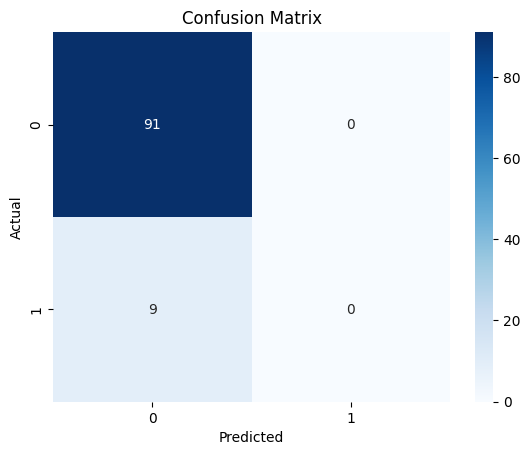

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        91
           1       0.00      0.00      0.00         9

    accuracy                           0.91       100
   macro avg       0.46      0.50      0.48       100
weighted avg       0.83      0.91      0.87       100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

In [19]:
import joblib
joblib.dump(model, "heart_failure_model.pkl")

['heart_failure_model.pkl']